In [50]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt

In [51]:
wl = np.linspace(400, 700)

air = ml.Non_Dispersion(1)
ETC1 = ml.Non_Dispersion(1.3)
ETC2 = ml.Non_Dispersion(1.45)
sodalime = ml.open_material('sodalime', 'Material')
sapphire = ml.Non_Dispersion(1.76)

sapp = tm.Design(
    [air,sapphire],
    [None, None]
).reflectance(550)

soda = tm.Design(
    [air, sodalime],
    [None, None]
).reflectance(550)

sapp1 = lambda d: tm.Design(
    [air, ETC1, sapphire],
    [None, d, None]
).reflectance(550)

soda1 = lambda d: tm.Design(
    [air, ETC1, sodalime],
    [None, d, None]
).reflectance(550)

sapp2 = lambda d: tm.Design(
    [air, ETC2, sapphire],
    [None, d, None]
).reflectance(550)

soda2 = lambda d: tm.Design(
    [air, ETC2, sodalime],
    [None, d, None]
).reflectance(550)

step = np.linspace(0, 100)
sappsub1 = []
sodasub1 = []
sappsub2 = []
sodasub2 = []

for i in step:
    sappsub1.append(np.mean(sapp1(i)))
    sodasub1.append(np.mean(soda1(i)))
    sappsub2.append(np.mean(sapp2(i)))
    sodasub2.append(np.mean(soda2(i)))
    


In [59]:
pd.DataFrame(
    {
        'thickness':step,
        'sapphire':sappsub2,
        'sodalime':sodasub2,
        'sappsub':sapp*np.ones(np.size(step)),
        'sodasub':soda*np.ones(np.size(step))
    }
).to_csv('./ss/ETCn145.csv')

In [60]:
pd.DataFrame(
    {
        'thickness':step,
        'sapphire':sappsub1,
        'sodalime':sodasub1,
        'sappsub':sapp*np.ones(np.size(step)),
        'sodasub':soda*np.ones(np.size(step))
    }
).to_csv('./ss/ETCn13.csv')

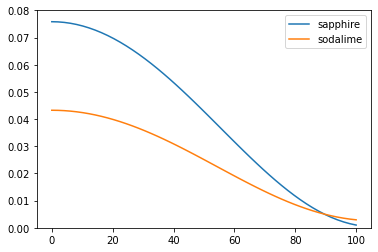

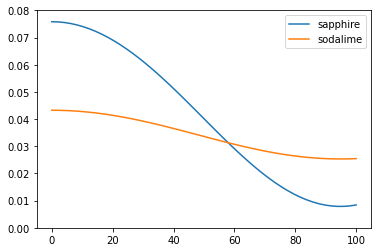

In [52]:
plt.plot(step, sappsub1, label = 'sapphire')
plt.plot(step, sodasub1, label = 'sodalime')
plt.ylim(0, 0.08)
plt.legend()
#plt.savefig('ETC13.png')
plt.show()
plt.plot(step, sappsub2, label = 'sapphire')
plt.plot(step, sodasub2, label = 'sodalime')
plt.ylim(0, 0.08)
plt.legend()
#plt.savefig('ETC.png')
plt.show()

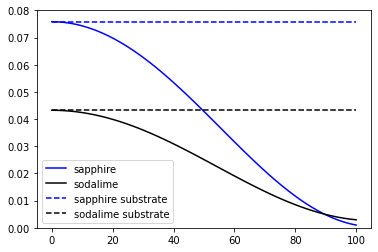

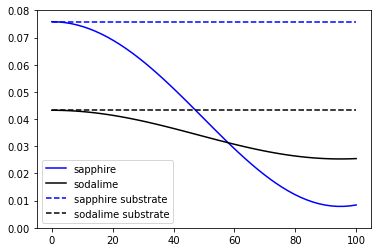

In [53]:
plt.plot(step, sappsub1, '-b',label = 'sapphire')
plt.plot(step, sodasub1, '-k',label = 'sodalime')
plt.plot(step, sapp*np.ones(np.size(step)), '--b', label ='sapphire substrate')
plt.plot(step, soda*np.ones(np.size(step)), '--k', label ='sodalime substrate')
plt.ylim(0, 0.08)
plt.legend()
#plt.savefig('ETC133.png')
plt.show()
plt.plot(step, sappsub2, '-b', label = 'sapphire')
plt.plot(step, sodasub2, '-k', label = 'sodalime')
plt.plot(step, sapp*np.ones(np.size(step)), '--b', label ='sapphire substrate')
plt.plot(step, soda*np.ones(np.size(step)), '--k', label ='sodalime substrate')
plt.ylim(0, 0.08)
plt.legend()
#plt.savefig('ETC11.png')
plt.show()

In [44]:
sodalime.nvalues(550)

array(1.52513873)